In [3]:
#importo le librerie
import pandas as pd
import numpy as np
import re
#data visualization
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from scipy.stats import norm

In [4]:
#leggo il database
dataset = pd.read_csv('winemag-data-130k-v2.csv')
dataset.copy()
dataset.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
dataset.shape

(129971, 14)

In [6]:
#restituisco i nomi delle colonne presenti in quel frame di dati
dataset.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [7]:
#controllo i nomi delle colonne e i tipi di dati che sono all'interno
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [8]:
#sintesi descrittiva dei dati statistici come media e std dei valori numerici della serie
dataset.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [9]:
#analizzo e sommo i valori nulli in tabella
total_counts_null = dataset.isnull().sum()
#calcolo il numero totale dei valori in ogni colonna
total_counts = dataset.shape[0]
#calcolo la percetuali dei valori nulli in ogni colonna
total_counts_null_perc=((total_counts_null/total_counts)*100).round(2).astype(str)+'%'
#creo un nuovo dataframe che contiene i risultati dei valori nulli e la percetuale
dataset_null_info = pd.DataFrame({'Number Null' : total_counts_null,'% Null' : total_counts_null_perc})
dataset_null_info

,Number Null,% Null
Unnamed: 0,0,0.0%
country,63,0.05%
description,0,0.0%
designation,37465,28.83%
points,0,0.0%
price,8996,6.92%
province,63,0.05%
region_1,21247,16.35%
region_2,79460,61.14%
taster_name,26244,20.19%


In [10]:
#definisco la funzione che estrare l'anno dal titolo utilizzando l'espressione regolare
def extract_year_from_str (text):
    #regex che descrive 4 numeri con uno spazio bianco prima e uno spazio bianco dopo
    regex_year = r"\s\d\d\d\d\s"
    #utilizzo la funzione findall per restituisce un elenco di tutte le corrispondenze della regex in text
    year = re.findall(regex_year, text)
    if year:
        #restituisco il primo elemento con indice 0 di year
        return int(year[0])
    else:
        return None

#richiamo la funzione con il campo title per estrarre l'anno
dataset['year'] = dataset['title'].apply(extract_year_from_str)
#sostituisco nella colonna year i valori NaN con 0 
dataset['year'].fillna(0, inplace=True)
#applico alla colonna year tipo di dato int
dataset['year'] = dataset['year'].astype(int)

#definisco la funzione che estrare l'anno dal titolo utilizzando l'espressione regolare
def extract_designation_from_str (row):
    if pd.isna(row['designation']):
        result=re.search(r"\s\d\d\d\d\s(.+?)\s\(",row['title'])
        if result:
            row['designation']=result.group(1)
        else:
            row['designation']=row['variety']
        #restituisco il primo elemento con indice 0 di year
    return row
dataset=dataset.apply(extract_designation_from_str, axis=1)

#rimuovo le colonne non necessarie dal DataFrame
dataset.drop(["Unnamed: 0", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle"],
             axis='columns', inplace=True)
#visualizzo il DataFrame aggiornato

dataset

,country,description,designation,points,price,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris,87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,Citation is given as much as a decade of bottl...,Pinot Noir,90,75.0,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013
129969,France,"A dry style of Pinot Gris, this is crisp with ...",Pinot Gris,90,32.0,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012


In [11]:
#DATASET DOPO LA PULIZIA OVVERO IL CLEANING DEI DATI
#analizzo e sommo i valori nulli in tabella
total_counts_null = dataset.isnull().sum()
#calcolo il numero totale dei valori in ogni colonna
total_counts = dataset.shape[0]
#calcolo la percetuali dei valori nulli in ogni colonna
total_counts_null_perc=((total_counts_null/total_counts)*100).round(2).astype(str)+'%'
#creo un nuovo dataframe che contiene i risultati dei valori nulli e la percetuale
dataset_null_info = pd.DataFrame({'Number Null' : total_counts_null,'% Null' : total_counts_null_perc})
dataset_null_info

,Number Null,% Null
country,63,0.05%
description,0,0.0%
designation,1,0.0%
points,0,0.0%
price,8996,6.92%
title,0,0.0%
variety,1,0.0%
winery,0,0.0%
year,0,0.0%


In [12]:
#controllo i nomi delle colonne e i tipi di dati
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   designation  129970 non-null  object 
 3   points       129971 non-null  int64  
 4   price        120975 non-null  float64
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
 8   year         129971 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 8.9+ MB


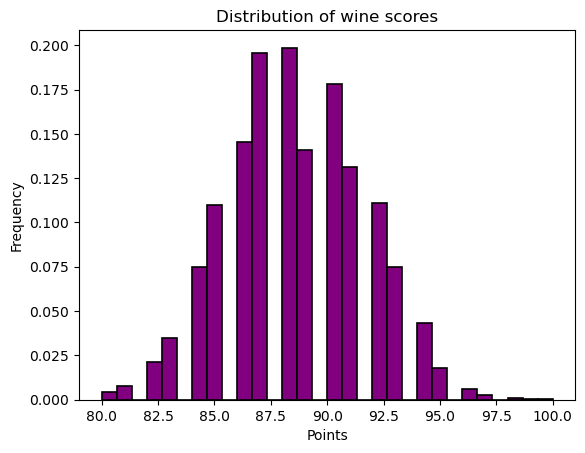

In [13]:
#DATA ANALYSIS AND VISUALISATION
#ANALISI POINTS VINI
#Istogramma che mostra la distribuzione dei punteggi dei vini
plt.hist(dataset['points'], bins=30, density=True, color='purple', edgecolor='black', linewidth=1.2)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of wine scores')
plt.show()

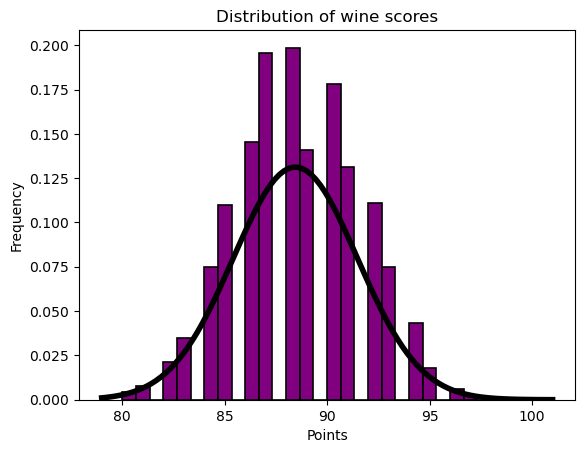

In [14]:
#Istogramma Gaussiano che mostra la distribuzione dei punteggi dei vini
data=dataset['points']
mu, std = norm.fit(data) 
 
#Traccio l'istogramma
plt.hist(data, bins=30, density=True, color='purple', edgecolor='black', linewidth=1.2)
 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

#Traccio la curva
plt.plot(x, p, 'k', linewidth=4)

plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of wine scores')
 
plt.show()

In [15]:
#Informazioni sulla colonnnna points
dataset['points'].describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

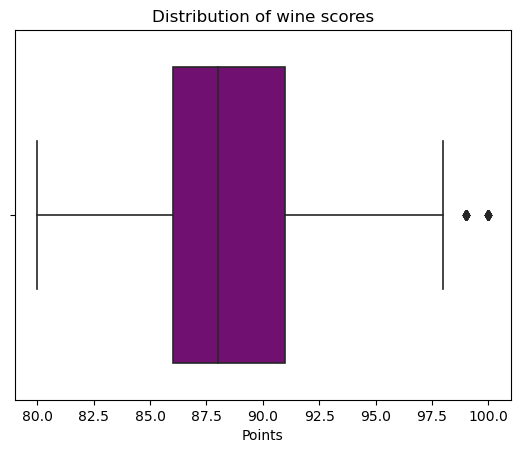

In [16]:
#Creo un box plot dei punteggi che rappresenta una panoramica dei punteggi e permette di visualizzare
#eventuali outliers ovvero valori fuori dalla norma
sns.boxplot(x=dataset['points'], linewidth=1.2, color='purple')
plt.xlabel('Points')
plt.title('Distribution of wine scores')
plt.show()

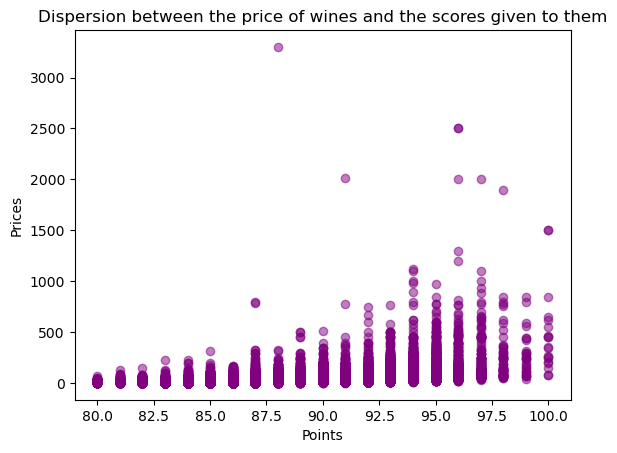

In [17]:
#ANALISI PRICES VINI
#Analizzo e visualizzo la dispersione tra il prezzo dei vini e i punteggi a loro attribuiti
plt.scatter(dataset['points'],dataset['price'], color='purple', alpha=0.5)
plt.xlabel('Points')
plt.ylabel('Prices')
plt.title('Dispersion between the price of wines and the scores given to them')
plt.show()

In [18]:
#Informazioni sulla colonna prices
dataset['price'].describe()
print(f"Curtosi: {dataset['price'].kurt()}")
print(f"Asimmetria: {dataset['price'].skew()}")

Curtosi: 829.5201815158334
Asimmetria: 18.000957415874364


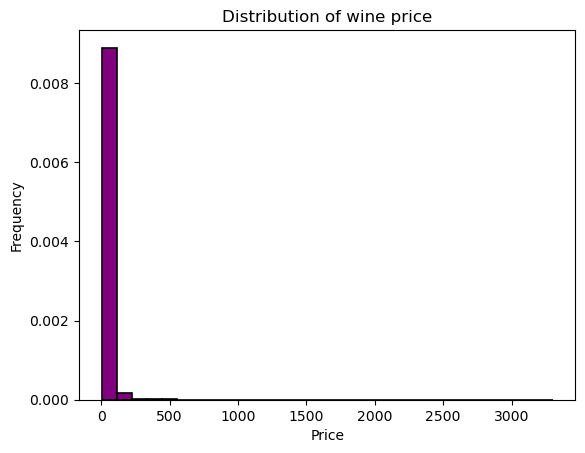

In [28]:
#Istogramma che mostra la distribuzione dei prezzi dei vini
plt.hist(dataset['price'], bins=30, density=True, color='purple', edgecolor='black', linewidth=1.2)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of wine price')
plt.show()

price
20.0      6940
15.0      6066
25.0      5805
30.0      4951
18.0      4883
          ... 
198.0        1
1125.0       1
470.0        1
268.0        1
848.0        1
Name: count, Length: 390, dtype: int64


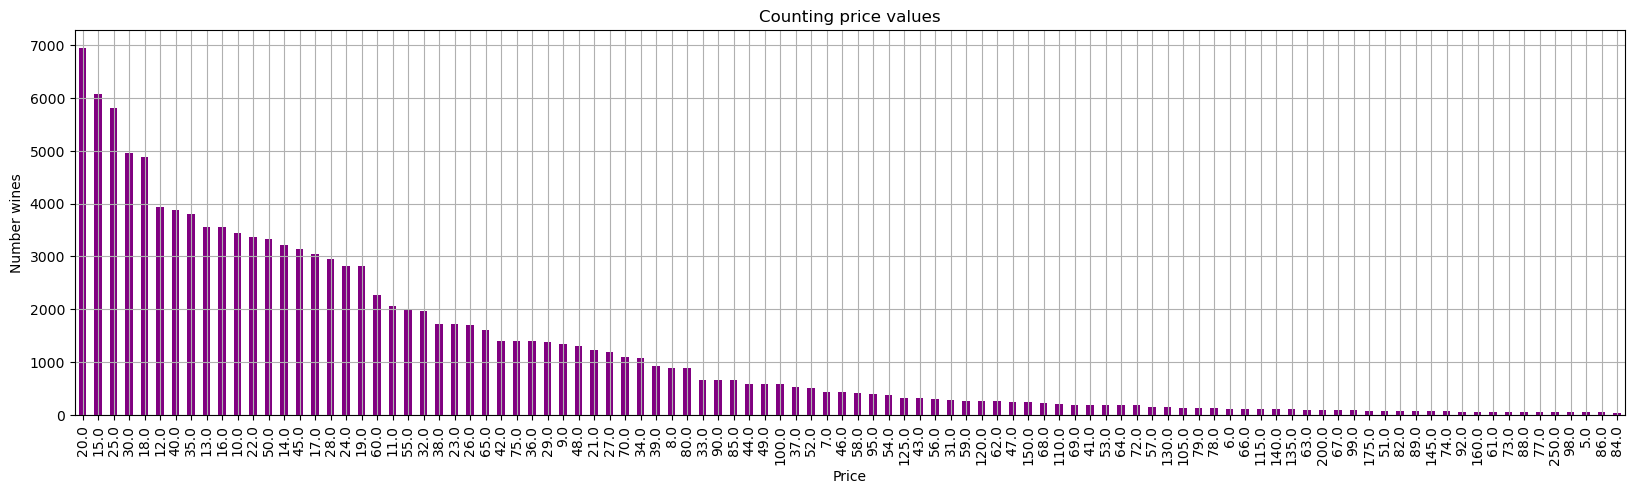

In [27]:
#Informazioni sulla colonna prices
counts_price=dataset['price'].value_counts().sort_values(ascending=False)
print(counts_price)
price_top=counts_price.head(100)
#Creo il grafico partendo dal conteggio dei prezzi per vini
price_top.plot(kind="bar", color='purple', figsize = (20, 5))
plt.title("Counting price values")
plt.xlabel("Price")
plt.ylabel("Number wines")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

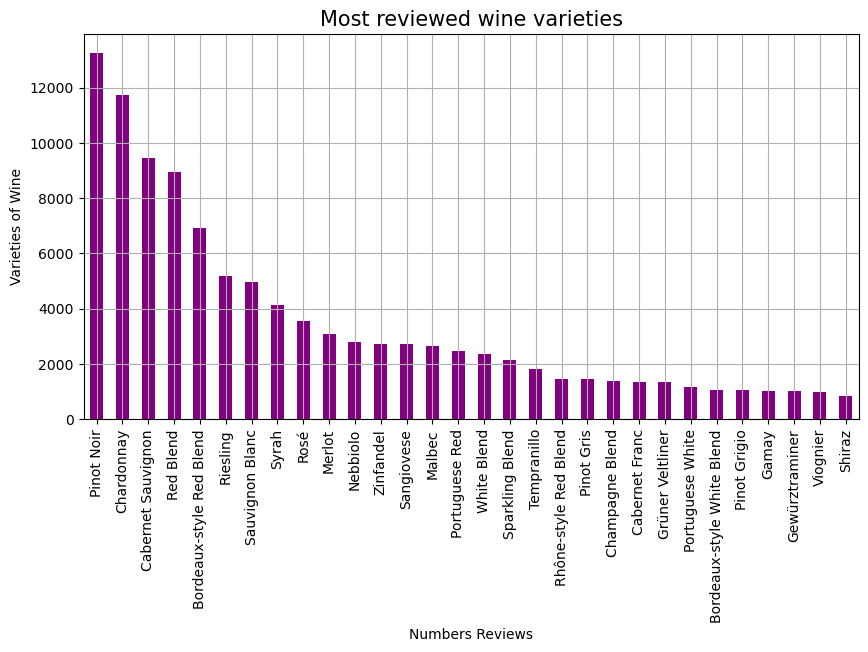

In [85]:
#ANALISI VARIETA' VINI
#Conto le varietà di vini e le ordino in modo decrescente
counts_variety=dataset['variety'].value_counts().sort_values(ascending=False)

#Mostro le prime 30 varietà più recensite
varieta_top=counts_variety.head(30)

#Creo l'istogramma che mostra le varietà più recensite
varieta_top.plot(kind="bar", color='purple', figsize = (10, 5))

plt.xlabel('Numbers Reviews',fontsize = 10)
plt.ylabel('Varieties of Wine', fontsize = 10)
plt.title('Most reviewed wine varieties',fontsize = 15)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

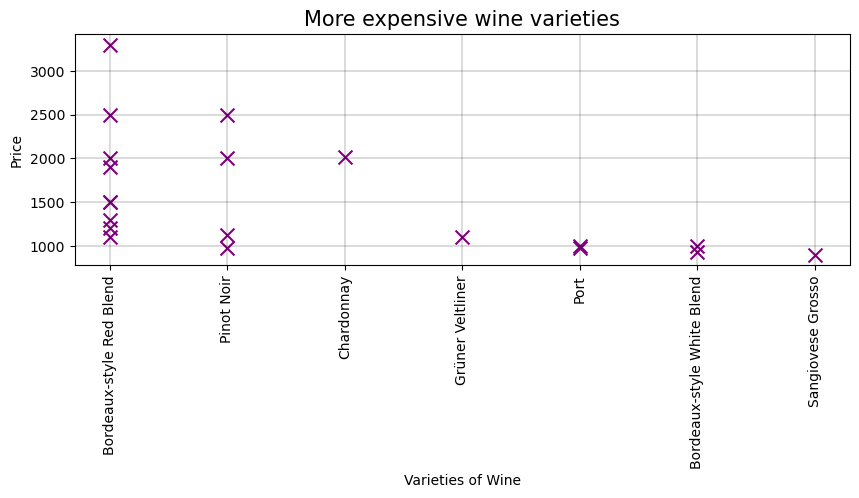

In [96]:
#Le 20 varietà di vino più costose
variety_countries= dataset.nlargest(20,'price')
plt.figure(figsize=(10,3))
#Scatter plot delle 20 varietà di vino più costose
plt.scatter(variety_countries['variety'], variety_countries['price'], marker='x', s=100, color='purple')
plt.xlabel('Varieties of Wine',fontsize = 10)
plt.ylabel('Price', fontsize = 10)
plt.title('More expensive wine varieties',fontsize = 15)
plt.grid(color = 'black', linewidth = 0.2)
plt.xticks(rotation=90)
plt.show()

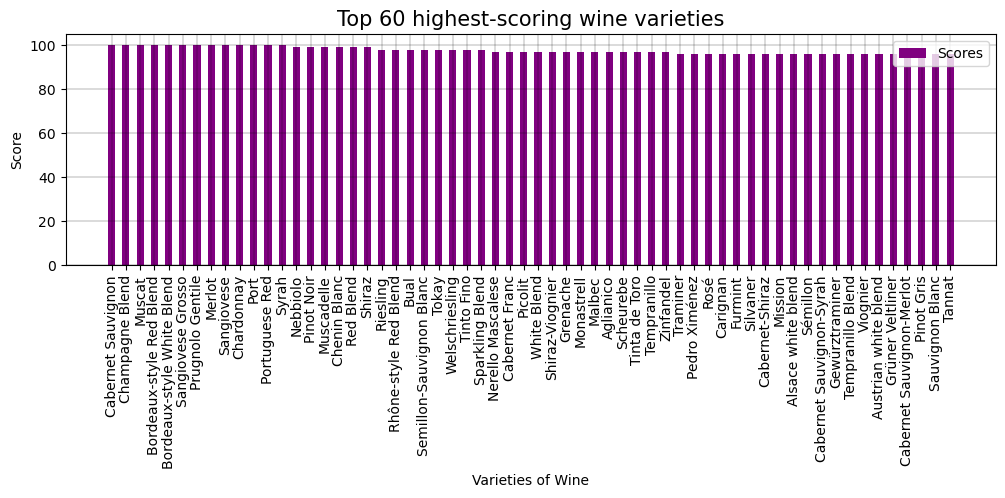

In [60]:
#ANALISI SULLE PRIME 60 QUALITA DI VINO CON UN PUNTEGGIO MAGGIORE
higher_points=dataset.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:60]
plt.figure(figsize=(12,3))
plt.bar(higher_points.index, higher_points['points'], width = 0.5, color = 'purple', label='Scores')
plt.legend()
plt.xticks(higher_points.index, rotation=90)
plt.xlabel('Varieties of Wine',fontsize = 10)
plt.ylabel('Score', fontsize = 10)
plt.title('Top 60 highest-scoring wine varieties',fontsize = 15)
plt.grid(color = 'black', linewidth = 0.2)
plt.show()

country
China                         1
Slovakia                      1
Egypt                         1
Armenia                       2
Bosnia and Herzegovina        2
Luxembourg                    6
Switzerland                   7
India                         9
Cyprus                       11
Czech Republic               12
Serbia                       12
Macedonia                    12
Ukraine                      14
Peru                         16
Morocco                      28
Lebanon                      35
Brazil                       52
Moldova                      59
Mexico                       70
Croatia                      73
England                      74
Georgia                      86
Slovenia                     87
Turkey                       90
Uruguay                     109
Romania                     120
Bulgaria                    141
Hungary                     146
Canada                      257
Greece                      466
Israel                      505


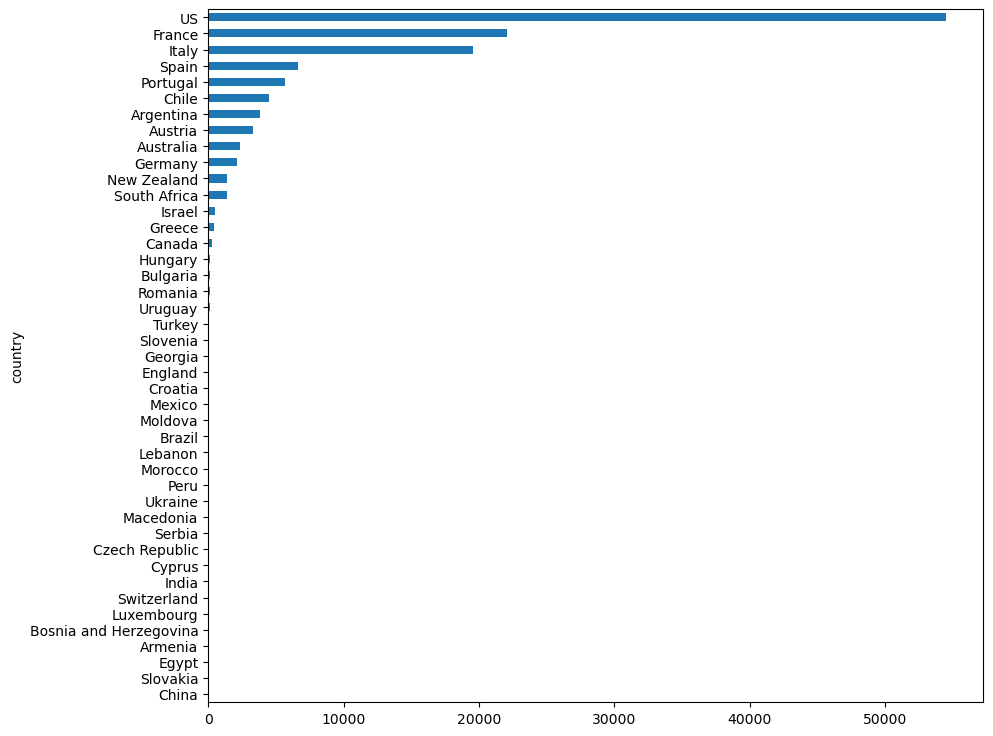

In [30]:
#NUMERO DI VINI PER PAESE
x=pd.Series=dataset.groupby(['country'])
groups_wines_country = dataset.groupby(['country']).size().sort_values(ascending=True)
#Mostro quanti vini ha ogni paese
groups_wines_country .plot.barh(figsize=(10,9))
print(groups_wines_country)

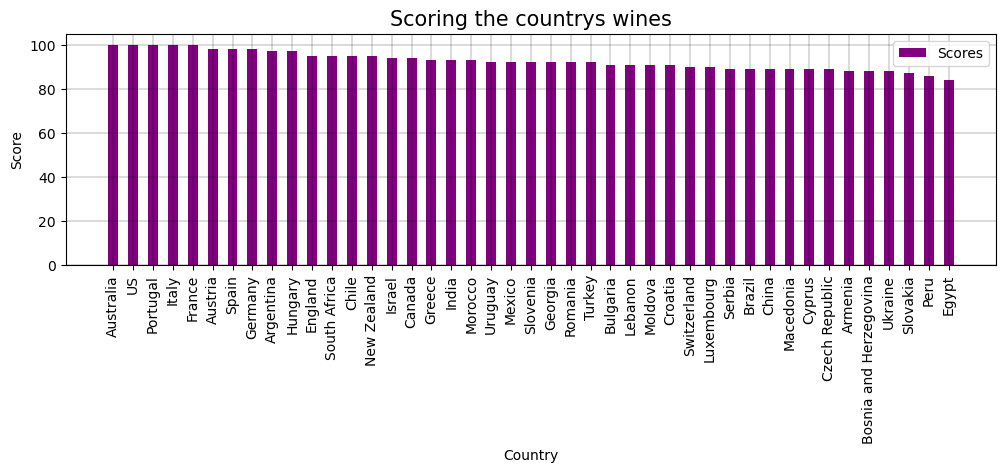

In [71]:
#ANALISI SUI PAESI CONI I VINI PIU' APPREZZATI
higher_points=dataset.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,3))
plt.bar(higher_points.index, higher_points['points'], width = 0.5, color = 'purple', label='Scores')
plt.legend()
plt.xticks(higher_points.index, rotation=90)
plt.xlabel('Country',fontsize = 10)
plt.ylabel('Score', fontsize = 10)
plt.title('Scoring the countrys wines',fontsize = 15)
plt.grid(color = 'black', linewidth = 0.2)
plt.show()

In [84]:
#CREAZIONE DEL CATALOGO E PREVISIONI DI INVESTIMENTO
max_price=400
min_price=20
min_score=95
wine_investment=80
prices_investiment=0
#CATALOGO
wines_for_purchase=dataset[(dataset['points']>min_score) & ((dataset['price']>=min_price) & (dataset['price']<=max_price))]
#NUMERO VINI IN CATALOGO
num_bottle_wine_purchase=wines_for_purchase.shape[0]
#CALCOLO INVESTIMENTO GLOBALE
for i in wines_for_purchase['price']:
    prices_investiment+=i

print(f'Numero consigliato di bottiglie da acquistare: {num_bottle_wine_purchase}')
print(f'Investimento Totale previsto: {round(prices_investiment,2)}€')
print(f'Prezzo medio per bottiglia di vino: {round(prices_investiment/num_bottle_wine_purchase,2)}€')

wines_for_purchase

Numero consigliato di bottiglie da acquistare: 716
Investimento Totale previsto: 90755.0€
Prezzo medio per bottiglia di vino: 126.75€


,country,description,designation,points,price,title,variety,winery,year
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,0
346,Australia,"This deep brown wine smells like a damp, mossy...",Rare,98,350.0,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards,0
348,Australia,Deep mahogany. Dried fig and black tea on the ...,Grand,97,100.0,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards,0
349,Australia,"RunRig is always complex, and the 2012 doesn't...",RunRig,97,225.0,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck,2012
350,Italy,"After a few minutes in the glass, this stunnin...",Vignolo Riserva,97,150.0,Cavallotto 2010 Vignolo Riserva (Barolo),Nebbiolo,Cavallotto,2010
...,...,...,...,...,...,...,...,...,...
128267,US,An extraordinary wine. It's the essence of Rus...,Gold Ridge,97,85.0,Semper 2007 Gold Ridge Pinot Noir (Russian Riv...,Pinot Noir,Semper,2007
128268,US,A monumental Cabernet that succeeds on every l...,Estate,97,50.0,Trefethen 2005 Estate Cabernet Sauvignon (Oak ...,Cabernet Sauvignon,Trefethen,2005
128269,US,"Massive, dramatic, beautiful, intense, but you...",Cabernet Sauvignon,97,100.0,Hestan 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Hestan,2006
128270,US,"Monumentally detailed, this 100% Cabernet Sauv...",Cabernet Sauvignon,97,65.0,Redmon 2006 Cabernet Sauvignon (St. Helena),Cabernet Sauvignon,Redmon,2006


In [125]:
#************************************************CONCLUSIONI************************************************************************-
#Tramite l’analisi del dataset abbiamo avuto la possibilità di capire come un vino costoto debba obbligatoriamente avere un punteggio alto ed essere considerato un vino di qualità. Abbiamo analizzato i paesi in correlazione al numero e alla qualità dei suoi vini; le varietà più recensite, quelle più costose e il prezzo medio delle varietà più costose; abbiamo anche analizzato i prezzi andando a dimostrare il divario e gli outlers rispetto al prezzo medio del vino. 
#Infine abbiamo progetto un potetico investimento per un marketplace che vorrebbe vendere vini di qualità provenienti da tutto il mondo e con un prezzo non eccessivamente sia ridotto che elevatocalcolando la spesa secondo i criteri scelti.
#Questa analisi può aiutare il venditore di vino a prendere delle decisioni sui futuri ordini o sulle future scelte commerciali, capendo approfonditamente i gusti più apprezzati, i paesi di origine con una buona qualità di vino e i prezzi medi per del vino di buona qualità.
#È stato un esempio di come l’analisi dei dati può essere utilizzata per prendere decisioni nel mondo reale. 
#In conclusione, questo progetto dimostra il potenziale dell’analisi dei dati nel prendere decisioni
#informate e personalizzate.